## Programación funcional

El paradigma funcional se centra en la aplicación del cálculo λ a la programación. Esto es, el desarrollo de programas formados por composiciones de funciones puras para el modelado de instrucciones de software.

Este paradigma tiene las siguiente particularidades:

+ No hay estados globales.
+ Todas las funciones son puras: dada una misma entrada siempre se devuelve una misma salida.
+ Todos los valores son inmutables: solo es posible generar nuevos valores.
+ No hay bucles: la iteración se hace recursivamente.

## Map

Permite aplicar una función sobre los items de un objeto de tipo iterable (lista, tuplas...). Esta función recibe 2 argumentos:

+ La función que se desea aplicar a los elementos del objeto iterable.
+ El objeto iterable.

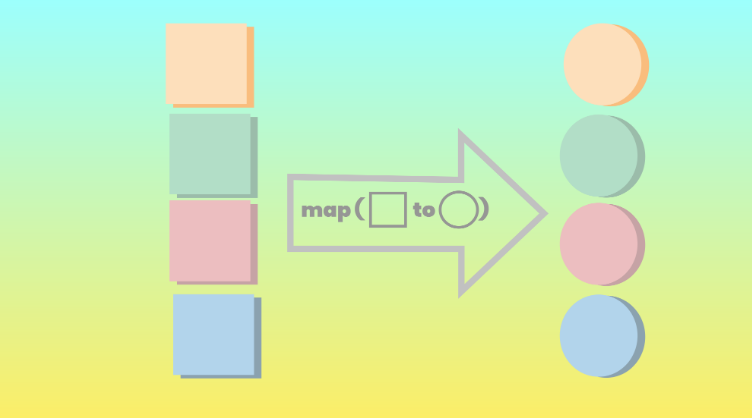

Un ejemplo de aplicación sería el siguiente: sea la siguiente lista de números, se busca multiplicar cada uno de ellos por 2. Un método ineficiente sería multiplicar manualmente cada uno de ellos por 2; lo que trae como consecuencia un código impráctico y no reutilizable en caso de que el factor $n$ de multiplicación o el número de elementos en la lista cambien.

In [7]:
# Lista de números
numeros = [1, 2, 3, 4, 5]

# Multiplicación manual de los elementos de la lista
numeros_por_dos = [numeros[0] * 2, numeros[1] * 2, numeros[2] * 2, numeros[3] * 2, numeros[4] * 2]

print(numeros_por_dos)

[2, 4, 6, 8, 10]


El primer paso para remediar esto es crear una función que reciba un número y aplique la multplicación por 2 al valor de entrada, devolviéndolo como resultado.

In [8]:
def multiplicar_por_dos(numero):
    return numero * 2

Ahora, usaremos la función $map$. Como se mencionó, $map$ recibe como parámetros una función que se aplicará a los elementos de un iterable; aplicándola elemento por elemento y devolviendo una lista con los elementos transformados según la función aplicada como parámetro.

In [9]:
# Aplicación de la función map: por sí misma solo devuelve un objeto map.
map(multiplicar_por_dos, numeros)

# Transformamos a una lista usando el método list()
map_numeros_por_dos = list(map(multiplicar_por_dos, numeros))
print(map_numeros_por_dos)

[2, 4, 6, 8, 10]


Si la lista de números a multiplicar aumentar, $map$ resulta en un enfoque mucho más eficiente con respecto al hard-coding manual, o bien, la multiplicación iterativa con ciclos $for$ o $while$. En el siguiente ejemplo, usando *list comprehension* generamos una lista de valores del 0 al 20 pares, a la cual se le aplicará la función map usada previamente.

In [16]:
# Lista de pares.
lista_2 = [x for x in range(21) if x % 2 == 0]
print(lista_2)

# Aplicamos función map.
lista_2_por_2 = list(map(multiplicar_por_dos, lista_2)) 
print(lista_2_por_2)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40]


Otros ejemplos de funciones aplicadas con $map$ son las siguientes:

In [22]:
# Devuelve el número sin cambios si es par, y si no, lo transforma en 0.
def si_non_regresar_0(numero):
    return numero if numero % 2 == 0 else 0
# Formatea el número como unidad monetaria.
def formato_de_dinero(numero):
    return f'${numero} MXN'

In [25]:
# Lista del 1 al 9
lista_3 = [x for x in range(10)]

# Aplicamos funciones con map
pares_non = list(map(si_non_regresar_0, lista_3))
print(pares_non)

formato_dinero = list(map(formato_de_dinero, lista_3))
print(formato_dinero)

[0, 0, 2, 0, 4, 0, 6, 0, 8, 0]
['$0 MXN', '$1 MXN', '$2 MXN', '$3 MXN', '$4 MXN', '$5 MXN', '$6 MXN', '$7 MXN', '$8 MXN', '$9 MXN']


## Filter

Esta función se utiliza, tal cual su nombre lo indica, para aplicar aplicar un filtro a los elementos de un iterable y, al igual que $map$, recibe 2 parámetros:

+ La función de filtrado a aplicar.
+ El iterable sobre el que se aplicará el filtrado

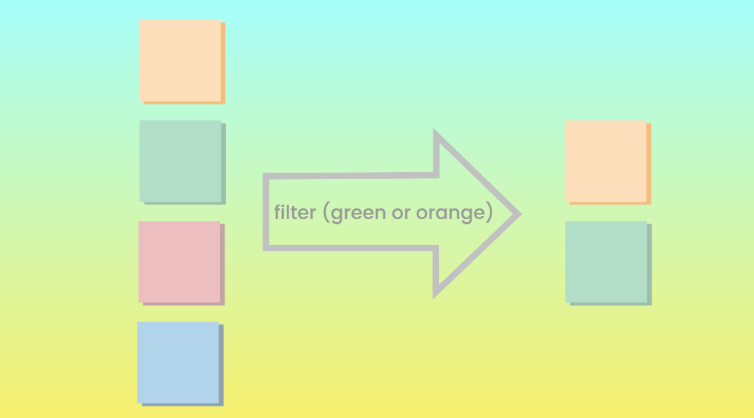

En el siguiente ejemplo, usamos una lista de 10 números enteros generados al azar para ejemplificar el uso de filter. El objetivo será filtrar la lista de modo que esta, al final, únicamente contenga números positivos.

In [30]:
def numero_es_positivo(numero):
    return True if numero >= 0 else False

In [31]:
import random
# Generamos lista de enteros positivos y negativos al azar 
lista_enteros = [random.randrange(-10, 10, 1) for i in range(7)]
print(lista_enteros)

[3, -8, -9, -3, 1, 5, 8]


Al aplicar $filter$ con la función definida y la lista de enteros, como resultado tendremos la lista sin los números negativos que estaban en su interior. En este caso, cuando la función retorna True, $filter$ agrega el elemento en la nueva lista, mientras que si la función de filtrado retorna False, se descarta. 

In [32]:
lista_filtrada = list(filter(numero_es_positivo, lista_enteros))
print(lista_filtrada)

[3, 1, 5, 8]


### Filtros con operadores lógicos

#### AND 
La compuerta AND implementa una conjunción lógica, es decir, dadas dos condiciones unidas bajo una sola sentencia, ambas deben cumplirse para que la sentencia sea verdadera. Simbólicamente, esto se representa como X y Y, es decir, representa una intersección de las condiciones de ambas sentencias:

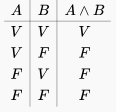
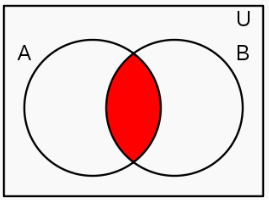

A continuación, generamos nuevamente una lista de enteros al azar y 2 funciones: una que verifique si un número es par y otra para verificar si el número es mayor a 50.

In [35]:
# Las 2 funciones a construir separadas
def numero_es_par(numero):
    return True if numero % 2 == 0 else False

def numero_es_mayor_a_50(numero):
    return True if numero > 50 else False

# Funciones fusionadas usando AND: esta es la que se enviará a filter.
def numero_es_par_y_mayor_a_50(numero):
    return True if numero % 2 == 0 and numero > 50 else False


In [45]:
# Generamos lista de enteros positivos
lista_enteros_positivos = [random.randrange(0, 100, 1) for i in range(10)]
print(lista_enteros_positivos)

[68, 80, 96, 40, 87, 9, 20, 78, 97, 1]


In [46]:
# Filtramos con ambas condiciones presentes en la función de filtrado: ambas deben cumplirse.
lista_and = list(filter(numero_es_par_y_mayor_a_50, lista_enteros_positivos))
print(lista_and)

[68, 80, 96, 78]


#### OR

La compuerta OR, a diferencia de la AND, retorna True tanto si ambas condiciones son verdaderas o solo una de ellas es verdadera. Esto se ve como una disyunción lógica de la forma X o Y (que en teoría de conjuntos se refiere a una unión):

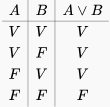
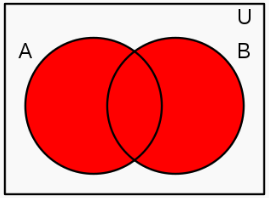

A continuación, vamos a modificar la función de filtrado anterior para usar el operador OR en su lugar. Con esto, los números filtrados pueden ser números pares, o bien, números mayores de 50 o números que cumplan ambas condiciones. Lo que debe notarse, sin embargo, es que como mínimo los números deben cumplir con alguna de las condiciones para que aparezcan en la lista.

In [50]:
# Funciones fusionadas usando OR: esta es la que se enviará a filter.
def numero_es_par_o_mayor_a_50(numero):
    return True if numero % 2 == 0 or numero > 50 else False

In [51]:
# Generamos otra lista de enteros positivos
lista_enteros_positivos_or = [random.randrange(0, 100, 1) for i in range(10)]
print(lista_enteros_positivos_or)

[79, 27, 81, 22, 61, 82, 56, 5, 27, 95]


In [52]:
# Filtramos con ambas condiciones presentes en la función de filtrado: al menos una debe cumplirse.
lista_or = list(filter(numero_es_par_o_mayor_a_50, lista_enteros_positivos_or))
print(lista_or)

[79, 81, 22, 61, 82, 56, 95]


Como se observa, todos los números menores a 50 necesariamente deben ser pares por la condición 1, mientras que por la condición 2 si los números son mayores a 50 estos se agregarán a la lista sin importar si son pares o no.

## Funciones Lambda

También llamadas funciones anónimas, son una forma de definir funciones utilizadas puntualmente para algún procedimiento en específico. La sintaxis de esta funciones es la siguiente:

```python
lambda x: f(x)
```

+ La palabra reservada *lambda* define el uso de esta clase de función.
+ $x$ representa el parámetro que recibirá la función anónima.
+ $f(x)$ representa la función que recibirá a $x$ a la entrada, ejecutará una operación, y devolverá un resultado.

Para ejemplificar su uso, retomaremos el ejemplo de la función *numero_es_par*, la cual estaba definida de la siguiente forma:

In [53]:
def numero_es_par(numero):
    return True if numero % 2 == 0 else False

Si quisieramos que al aplicar un $filter$, en lugar de obtener una lista de números pares, obtuviésemos una lista de números nones, tendríamos que invertir la condición lógica que definimos en la función. Esto se podría lograr simplemente invirtiendo las condiciones que están en las funciones, sin embargo, eso implicaría modificarla por completo. Entonces, para hacer este cambio sin modificar a la función, podemos negar los valores lógicos que envía a su salida.

#### NOT

La compuerta lógica NOT se trata de una negación lógica, donde dada una condición $X$ con un valor de verdad (True, por ejemplo), la aplicación de NOT dará como resultado $¬X$, con un valor de verdad igual a False.

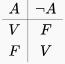
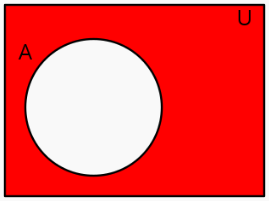

Con lo anterior, entonces vamos a aplicar un filtro que niegue los valores de salida de la función *numero_es_par*, de manera que ahora su comportamiento será inverso: filtrará numeros pares y permitirá numeros nones.

In [54]:
# Generamos otra lista de enteros positivos
lista_lambda = [random.randrange(0, 100, 1) for i in range(10)]
print(lista_lambda)

[51, 41, 48, 7, 30, 76, 83, 72, 61, 55]


In [56]:
# Nota que al parámetro anónimo X se le aplica la función numero_es_par, y la salida de la función se niega; invirtiendo su valor lógico.
lista_inversa = list(filter(lambda x: not numero_es_par(x), lista_lambda))
print(lista_inversa)

[51, 41, 7, 83, 61, 55]


#### Ejemplos

En general, el uso de funciones lambda es específico para aquellas funciones que solo realizan procedimientos sencillos que pueden ser codificados en una sola línea de código. Por ejemplo, la mayoría de las funciones escritas previamente pueden reescribirse directamente como funciones lambda aplicadas directamente a las funciones map o filter. Veamos la reescritura de *numero_es_par_y_mayor_a_50* en forma de función lambda.

In [ ]:
# Definición original de la función
def numero_es_par_y_mayor_a_50(numero):
    return True if numero % 2 == 0 and numero > 50 else False

In [77]:
# Lista de enteros positivos del ejemplo de AND
print(lista_enteros_positivos)

# Trasladamos la función original como una función lambda.
# Se evalúa con el argumento "número" a f(x): TRUE si ambas expresiones son TRUE y FALSE en caso contrario.
lista_lambda_filter = list(filter(lambda numero: numero % 2 == 0 and numero > 50, lista_enteros_positivos))
print(lista_lambda_filter)

[68, 80, 96, 40, 87, 9, 20, 78, 97, 1]
[68, 80, 96, 78]


Otros ejemplos implican hacer cálculos simples sobre alguna lista, como sumas o restas, sin necesidad de escribir una función completa para hacer un cálculo sencillo.

In [78]:
# Lista del 1 al 9
lista_ejemplo = [x for x in range(10)]
print(lista_ejemplo)

# Función lambda que multiplica todos los elementos de una lista por 3 con map
lista_multiplicada = list(map(lambda numero: numero * 3, lista_ejemplo))
print(lista_multiplicada)

# Función lambda que filtra los números para que solo muestre mayores a 15 de la lista multiplicada
lista_filtrada_l = list(filter(lambda numero: numero > 15 , lista_multiplicada))
print(lista_filtrada_l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
[18, 21, 24, 27]
